In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

# Data Loading

In [52]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4th-Year-Final-Project/Common_Positive_PPIN.csv")
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4th-Year-Final-Project/Common_Negative_PPIN.csv")

# Data Pre-Processing

In [53]:
df1['Label']=1

In [54]:
df1.head()

,Entry,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Labels,Label
0,P04626,7405.1810,85,0.649924,2.104917,0,38386.516,0.005882,0,1,1
1,P40692,2282.4443,71,0.000000,2.094998,0,5950.000,0.002882,0,1,1
2,P31749,1135.2495,59,0.075374,2.082926,0,26688.992,0.005872,0,1,1
3,P21860,1062.4734,32,0.239502,2.025658,0,9964.096,0.005873,0,1,1
4,P40763,703.4832,50,0.094450,2.070304,0,26706.227,0.005869,0,1,1


In [55]:
df2['Label']=0

In [56]:
df2

,Entry,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Labels,Label
0,Q92993,1.528041e+06,223,0.705912,2.030238,0,78592.0000,0.016846,0,0,0
1,P04637,7.175487e+03,2,0.048329,1.220236,0,7676.6665,0.016693,0,0,0
2,P05067,7.175284e+03,2,0.048329,1.220236,0,7676.6665,0.016693,0,0,0
3,Q9Y2D8,7.175274e+03,2,0.048329,1.220236,0,7676.6665,0.016693,0,0,0
4,O75031,6.892286e+03,2,0.047401,1.220236,0,2520.0000,0.016637,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
340,Q8TAP6,1.589092e+00,1,0.000000,1.015006,0,0.0000,0.002915,0,0,0
341,Q12800,1.589092e+00,1,0.000000,1.015006,0,0.0000,0.002915,0,0,0
342,Q9BSK4,1.589092e+00,1,0.000000,1.015006,0,0.0000,0.002915,0,0,0
343,P38879,1.543081e+00,1,0.000000,1.015006,0,0.0000,0.002907,0,0,0


In [57]:
df2.describe()

,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Labels,Label
count,3.450000e+02,345.000000,345.000000,345.000000,345.0,345.000000,345.000000,345.0,345.0,345.0
mean,8.893766e+03,1.976812,0.032898,1.034467,0.0,413.002897,0.014281,0.0,0.0,0.0
std,8.209152e+04,12.363418,0.042680,0.113226,0.0,4510.129831,0.005053,0.0,0.0,0.0
min,1.543081e+00,1.000000,0.000000,1.015006,0.0,0.000000,0.002907,0.0,0.0,0.0
25%,1.597443e+01,1.000000,0.000929,1.015006,0.0,0.000000,0.016321,0.0,0.0,0.0
50%,6.890695e+03,1.000000,0.047401,1.015006,0.0,0.000000,0.016614,0.0,0.0,0.0
75%,6.890695e+03,1.000000,0.047401,1.015006,0.0,0.000000,0.016614,0.0,0.0,0.0
max,1.528041e+06,223.000000,0.705912,2.030238,0.0,78592.000000,0.016846,0.0,0.0,0.0


In [58]:
df2.dtypes

,0
Entry,object
Subgragh,float64
Degree,int64
Eigenvector,float64
Information,float64
LAC,int64
Betweenness,float64
Closeness,float64
Network,int64
Labels,int64


In [59]:
merged_df = pd.concat([df1, df2], axis=0)

In [60]:
merged_df

,Entry,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Labels,Label
0,P04626,7405.181000,85,0.649924,2.104917,0,38386.516,0.005882,0,1,1
1,P40692,2282.444300,71,0.000000,2.094998,0,5950.000,0.002882,0,1,1
2,P31749,1135.249500,59,0.075374,2.082926,0,26688.992,0.005872,0,1,1
3,P21860,1062.473400,32,0.239502,2.025658,0,9964.096,0.005873,0,1,1
4,P40763,703.483200,50,0.094450,2.070304,0,26706.227,0.005869,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
340,Q8TAP6,1.589092,1,0.000000,1.015006,0,0.000,0.002915,0,0,0
341,Q12800,1.589092,1,0.000000,1.015006,0,0.000,0.002915,0,0,0
342,Q9BSK4,1.589092,1,0.000000,1.015006,0,0.000,0.002915,0,0,0
343,P38879,1.543081,1,0.000000,1.015006,0,0.000,0.002907,0,0,0


In [61]:
df=merged_df.reset_index(drop=True)

In [62]:
df.shape

(770, 11)

In [63]:
df.drop(['Entry'],axis=1,inplace=True)

In [64]:
df

,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Labels,Label
0,7405.181000,85,0.649924,2.104917,0,38386.516,0.005882,0,1,1
1,2282.444300,71,0.000000,2.094998,0,5950.000,0.002882,0,1,1
2,1135.249500,59,0.075374,2.082926,0,26688.992,0.005872,0,1,1
3,1062.473400,32,0.239502,2.025658,0,9964.096,0.005873,0,1,1
4,703.483200,50,0.094450,2.070304,0,26706.227,0.005869,0,1,1
...,...,...,...,...,...,...,...,...,...,...
765,1.589092,1,0.000000,1.015006,0,0.000,0.002915,0,0,0
766,1.589092,1,0.000000,1.015006,0,0.000,0.002915,0,0,0
767,1.589092,1,0.000000,1.015006,0,0.000,0.002915,0,0,0
768,1.543081,1,0.000000,1.015006,0,0.000,0.002907,0,0,0


# Train Test Split

In [65]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(df[['Entry Name','Subgragh','Degree','Eigenvector','Information','LAC','Betweenness','Closeness','Network']],df['Label'],test_size=0.2,random_state=25)
x_train,x_test,y_train,y_test=train_test_split(df[['Subgragh','Degree','Eigenvector','Information','LAC','Betweenness','Closeness','Network']],df['Label'],test_size=0.2,random_state=25)

In [66]:
x_test

,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network
380,1.952938,1,0.000104,1.040417,0,0.0,0.005823,0
39,79.096085,1,0.066539,1.040417,0,0.0,0.005861,0
346,4.782938,1,0.000336,1.040417,0,0.0,0.005837,0
416,1.638192,1,0.000000,1.040417,0,0.0,0.002370,0
612,6890.695000,1,0.047401,1.015006,0,0.0,0.016614,0
...,...,...,...,...,...,...,...,...
396,1.780605,1,0.000058,1.040417,0,0.0,0.005791,0
153,33.133186,1,0.000000,1.040417,0,0.0,0.002880,0
532,6890.695000,1,0.047401,1.015006,0,0.0,0.016614,0
441,6890.695000,1,0.047401,1.015006,0,0.0,0.016614,0


In [67]:
len(y_train)

616

In [68]:
x_train.shape

(616, 8)

In [69]:
x_train.dtypes

,0
Subgragh,float64
Degree,int64
Eigenvector,float64
Information,float64
LAC,int64
Betweenness,float64
Closeness,float64
Network,int64


In [70]:
x_train

,Subgragh,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network
580,6890.695000,1,0.047401,1.015006,0,0.0000,0.016614,0
114,33.133995,1,0.000000,1.040417,0,0.0000,0.002880,0
620,6890.695000,1,0.047401,1.015006,0,0.0000,0.016614,0
509,6890.695000,1,0.047401,1.015006,0,0.0000,0.016614,0
331,4.782947,1,0.000336,1.040417,0,0.0000,0.005837,0
...,...,...,...,...,...,...,...,...
317,7.951388,1,0.000000,1.040417,0,0.0000,0.002597,0
143,33.133190,1,0.000000,1.040417,0,0.0000,0.002880,0
474,6890.695000,1,0.047401,1.015006,0,0.0000,0.016614,0
318,7.810595,3,0.012213,1.403845,0,213.6306,0.005844,0


In [71]:
def Conf(pred):
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  cm=confusion_matrix(y_test,pred)
  ax=plt.subplot()
  sns.heatmap(cm,annot=True,ax=ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  plt.show()

In [72]:
y_train.index

Index([580, 114, 620, 509, 331, 118, 338, 271, 520, 718,
       ...
       253, 156, 136, 151, 255, 317, 143, 474, 318, 132],
      dtype='int64', length=616)

In [73]:
y_test.index=[*range(len(y_test))]
y_test.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153],
      dtype='int64', length=154)

# Support Vector Machine

In [74]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [75]:
prediction1 = model_svc.predict(x_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction1))
for i in range(len(prediction1)):
    print(y_test[i],prediction1[i])

0.8181818181818182
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 1
1 1
1 1
0 0
1 1
0 1
0 1
0 1
1 1
0 0
0 1
0 1
1 1
0 0
0 0
1 1
1 1
0 1
1 1
0 1
0 1
0 0
1 1
0 1
0 0
0 0
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
0 0
0 1
1 1
0 0
0 0
0 1
0 0
0 1
1 1
1 1
0 0
0 1
0 0
0 0
0 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 1
0 1
1 1
1 1
0 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 1
1 1
0 0
1 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
0 0
1 1
0 0
1 1
1 1
0 0
1 1
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1


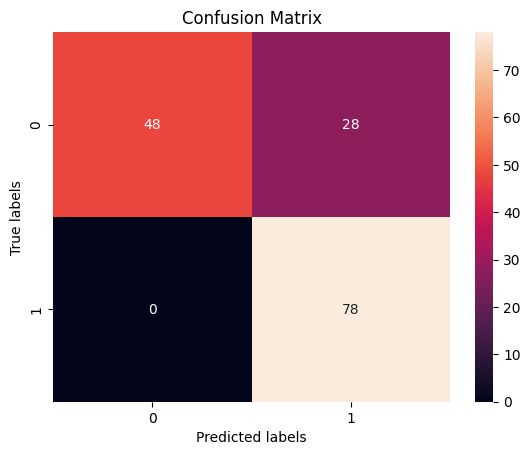

In [76]:
Conf(prediction1)

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
prediction2 = model_LR.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, prediction2))
for i in range(len(prediction1)):
  print(y_test[i], prediction1[i])

0.8116883116883117
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 1
1 1
1 1
0 0
1 1
0 1
0 1
0 1
1 1
0 0
0 1
0 1
1 1
0 0
0 0
1 1
1 1
0 1
1 1
0 1
0 1
0 0
1 1
0 1
0 0
0 0
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
0 0
0 1
1 1
0 0
0 0
0 1
0 0
0 1
1 1
1 1
0 0
0 1
0 0
0 0
0 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 1
0 1
1 1
1 1
0 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 1
1 1
0 0
1 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
0 0
1 1
0 0
1 1
1 1
0 0
1 1
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1


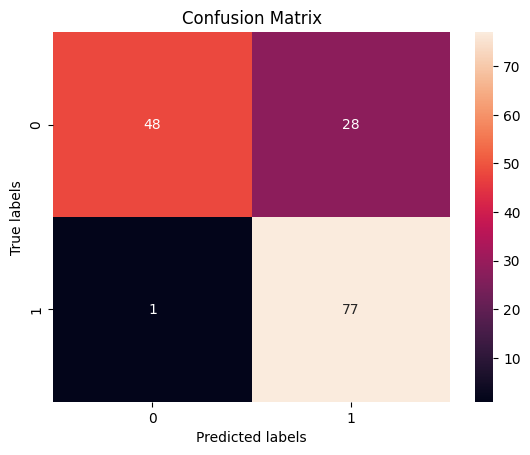

In [79]:
Conf(prediction2)

# Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [81]:
prediction3 = model_DTC.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction3))

1.0


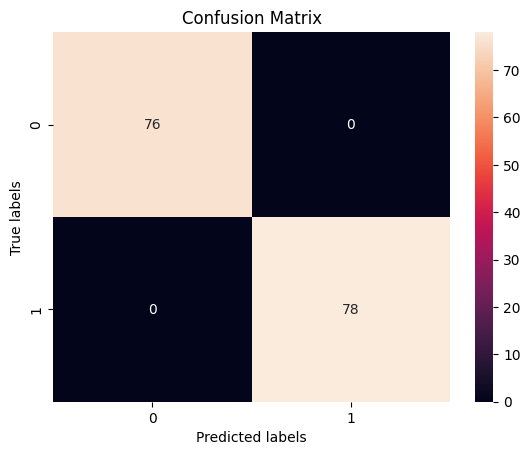

In [82]:
Conf(prediction3)

# Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)

RandomForestClassifier()

In [84]:
prediction4 = model_RF.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction4))

0.9935064935064936


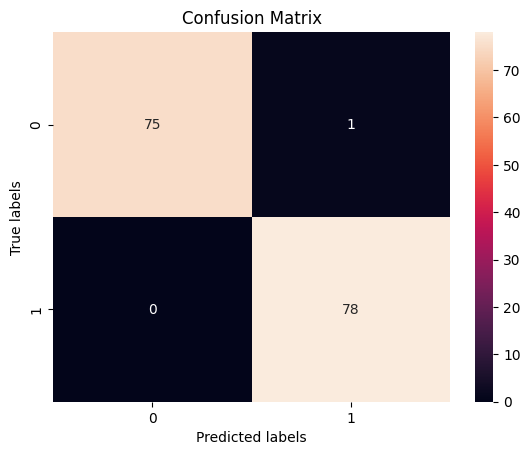

In [85]:
Conf(prediction4)

# Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)

GaussianNB()

In [87]:
prediction5 = model_NB.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction5))

0.8116883116883117


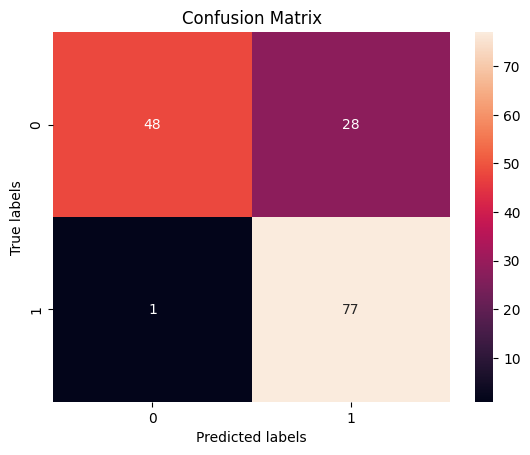

In [88]:
Conf(prediction5)

# K-Nearest Neighbour

In [89]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier()
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [90]:
prediction6 = model_KNN.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction6))

0.974025974025974


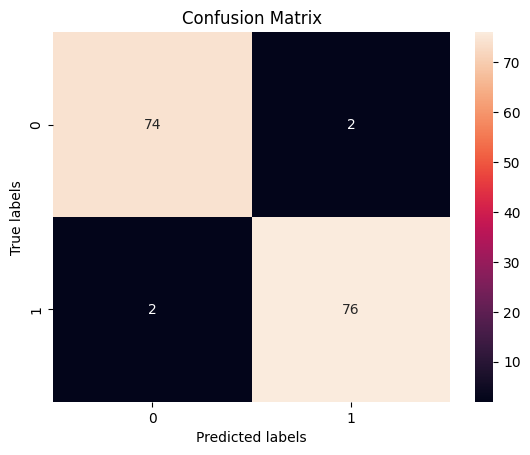

In [91]:
Conf(prediction6)

# XGBoost

In [92]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
dtrain=xgb.DMatrix(x_train, label=y_train)
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'learning_rate': 0.1,
    'max_depth': 10,
    'alpha': 10
}
model_XGB = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)
dtest=xgb.DMatrix(x_test)

In [93]:
prediction7 = model_XGB.predict(dtest)
#Calculate the accuracy
y_test = le.fit_transform(y_test)
accuracy=sum(prediction7==y_test)/len(y_test)
print(accuracy)

0.987012987012987


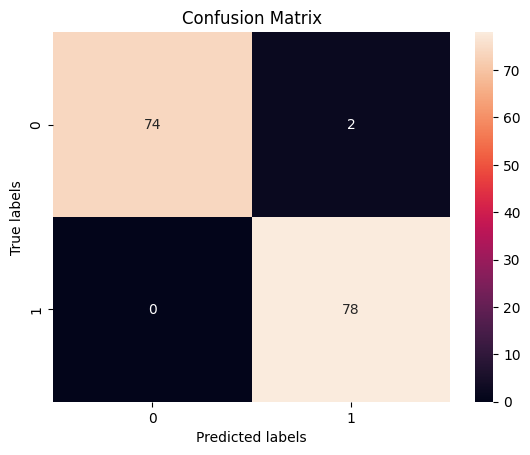

In [94]:
Conf(prediction7)

# AdaBoost

In [95]:
from sklearn.ensemble import AdaBoostClassifier
model_ADB = AdaBoostClassifier(n_estimators=100)
model_ADB.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [96]:
prediction8 = model_ADB.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction8))

1.0


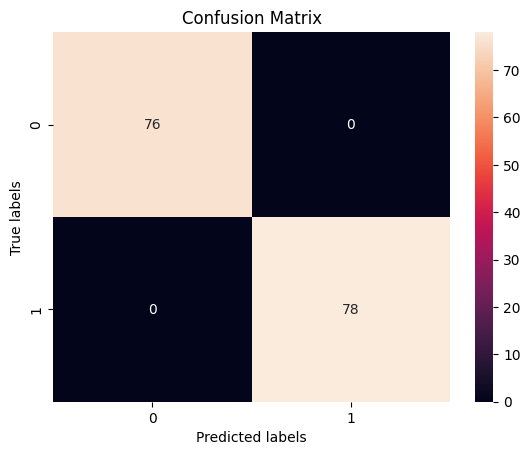

In [97]:
Conf(prediction8)

# Sequential Deep Learning

In [98]:
model = keras.Sequential([
    #keras.layers.Dense(10, input_shape=(607,9), activation='sigmoid')
    keras.layers.Dense(26, input_dim=8, activation='softmax'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=700)

Epoch 1/700


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5952 - loss: 0.7069
Epoch 2/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5519 - loss: 0.6905
Epoch 3/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5814 - loss: 0.6640
Epoch 4/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5685 - loss: 0.6492
Epoch 5/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7204 - loss: 0.6322
Epoch 6/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8389 - loss: 0.6043
Epoch 7/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8306 - loss: 0.5852
Epoch 8/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8347 - loss: 0.5687
Epoch 9/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8237 - loss: 0.5536
Epoch 10/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8002 - loss: 0.5461
Epoch 11/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8221 - loss: 0.5217
Epoch 12/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8523 - lo

In [99]:
predictions = model.predict(x_test)
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


# ROC Curve

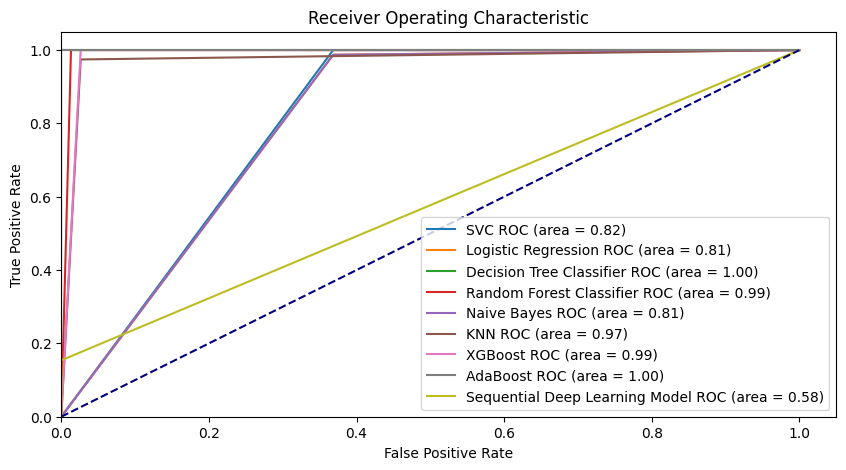

In [100]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a list to store ROC data
roc_data = []

# Define a function to calculate ROC data
def calc_roc(y_test, pred, model_name):
    fpr, tpr, _ = roc_curve(y_test.astype(int), pred.astype(int))
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc, model_name))

# Calculate ROC data for each model
calc_roc(y_test, prediction1, 'SVC')
calc_roc(y_test, prediction2, 'Logistic Regression')
calc_roc(y_test, prediction3, 'Decision Tree Classifier')
calc_roc(y_test, prediction4, 'Random Forest Classifier')
calc_roc(y_test, prediction5, 'Naive Bayes')
calc_roc(y_test, prediction6, 'KNN')
calc_roc(y_test, prediction7, 'XGBoost')
calc_roc(y_test, prediction8, 'AdaBoost')
calc_roc(y_test, predictions, 'Sequential Deep Learning Model')
# and so on for each model...

# Plot all ROC curves on the same graph
plt.figure(figsize=(10,5))

for fpr, tpr, roc_auc, model_name in roc_data:
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model_name, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()